In [1]:
import numpy as np
import pandas as pd
import os
import sys
import cv2
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt

In [3]:
IMG_SAVE_PATH = os.getcwd()

In [5]:
CLASS_MAP = {
    "rock": 0,
    "paper": 1,
    "scissors": 2,
    "none": 3
}

NUM_CLASSES = len(CLASS_MAP)


def mapper(val):
    return CLASS_MAP[val]

In [6]:
dataset = []
for directory in os.listdir(IMG_SAVE_PATH):
    path = os.path.join(IMG_SAVE_PATH, directory)
    if not os.path.isdir(path):
        continue
    for item in os.listdir(path):
        # to make sure no hidden files get in our way
        if item.startswith("."):
            continue
        img = cv2.imread(os.path.join(path, item))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256))
        dataset.append([img, directory])


data, labels = zip(*dataset)

print(labels)
labels = list(map(mapper, labels))

print(labels)

('none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none',

In [7]:
data = np.array(data)
#data = np.expand_dims(data, axis=3)

In [8]:
data.shape

(800, 256, 256, 3)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(data,labels)

In [119]:
# x_train = x_train / 255
# x_test = x_test / 255

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
600/600 [==============================] - 68s 114ms/sample - loss: 978.5470 - acc: 0.2283
Epoch 2/10
600/600 [==============================] - 51s 84ms/sample - loss: 1.5331 - acc: 0.2583
Epoch 3/10
600/600 [==============================] - 52s 86ms/sample - loss: 1.2024 - acc: 0.3250
Epoch 4/10
600/600 [==============================] - 58s 96ms/sample - loss: 1.0272 - acc: 0.3833
Epoch 5/10
600/600 [==============================] - 53s 89ms/sample - loss: 0.9760 - acc: 0.3083
Epoch 6/10
600/600 [==============================] - 59s 99ms/sample - loss: 0.9356 - acc: 0.2850
Epoch 7/10
600/600 [==============================] - 60s 99ms/sample - loss: 0.9160 - acc: 0.3967
Epoch 8/10
600/600 [==============================] - 61s 102ms/sample - loss: 0.7927 - acc: 0.5167
Epoch 9/10
600/600 [==============================] - 62s 104ms/sample - loss: 0.5702 - acc: 0.8400
Epoch 10/10
600/600 [==============================] - 60s 100ms/sample - loss: 0.4181 - acc: 0.9767


In [17]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 246016)           

In [18]:
loss, acc = cnn.evaluate(x_test, y_test)
print('Test score:', loss)
print('Test accuracy:', acc)

200/200 [==============================] - 17s 86ms/sample - loss: 0.7029 - acc: 0.9250
Test score: 0.7028584933280945
Test accuracy: 0.925


In [19]:
cnn.save('model.h5')

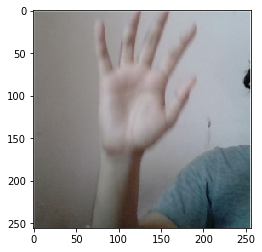

In [22]:
plt.imshow(x_test[122])

In [54]:
pred = cnn.predict(x_test)

In [60]:
new_pred = []
for i in range(len(pred)):
    new_pred.append(np.argmax(pred[i]))

In [57]:
new_pred = np.array(new_pred)

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,new_pred)

array([[57,  0,  0,  0],
       [ 0, 52,  0,  0],
       [13,  0, 24,  2],
       [ 0,  0,  0, 52]], dtype=int64)

In [25]:
p = np.argmax(pred[122])

In [27]:
for key,val in CLASS_MAP.items():
    if val==p:
        print(key)
        break

paper
